#  Pick up the following stocks and generate forecasts accordingly - Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller

from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data=pd.read_csv("C:/Users/nbs3/Downloads/data_stocks.csv")
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# 1. NASDAQ.AAPL

In [5]:
price=data['NASDAQ.AAPL']
price.head()

0    143.6800
1    143.7000
2    143.6901
3    143.6400
4    143.6600
Name: NASDAQ.AAPL, dtype: float64

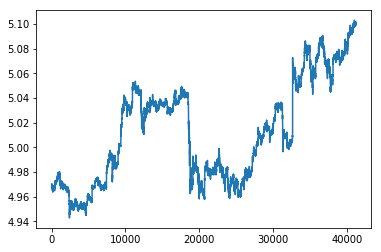

In [8]:
import numpy as np
import matplotlib.pyplot as plt
lnprice=np.log(price)
lnprice
plt.plot(lnprice)
plt.show()

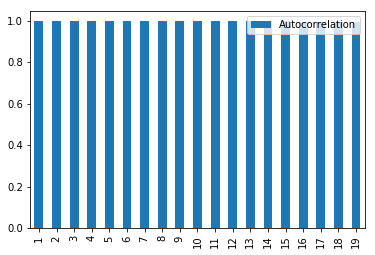

In [14]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
acf_1= acf(lnprice)[1:20]
test_df=pd.DataFrame([acf_1]).T
test_df.columns=['Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

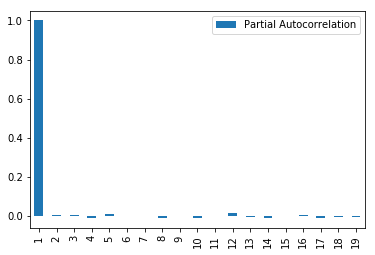

In [17]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
pacf_1= pacf(lnprice)[1:20]
test_df=pd.DataFrame([pacf_1]).T
test_df.columns=['Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

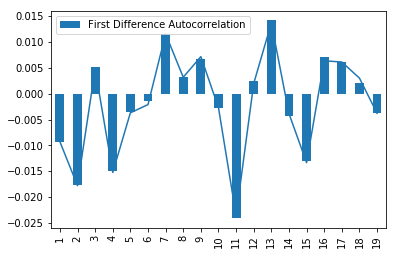

In [20]:
import statsmodels.tsa.stattools as ts
result=ts.adfuller(lnprice,1)
result
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff=acf(diff)[1:20]
test_df=pd.DataFrame([acf_1_diff]).T
test_df.columns=['First Difference Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
pacf_1_diff=pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

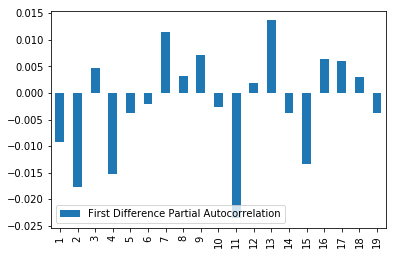

In [21]:
test_df=pd.DataFrame([pacf_1_diff]).T
test_df.columns=['First Difference Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(2, 1, 0)   Log Likelihood              246366.720
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 21 Nov 2018   AIC                        -492725.439
Time:                        17:52:45   BIC                        -492690.928
Sample:                             1   HQIC                       -492714.532
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.201e-06   2.96e-06      1.081      0.280    -2.6e-06       9e-06
ar.L1.D.y     -0.0094      0.005     -1.915      0.056      -0.019       0.000
ar.L2.D.y     -0.0178      0.005     -3.608      0.0

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


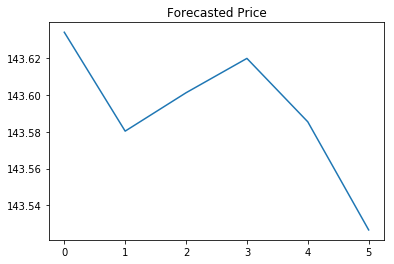

In [34]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
price_matrix=lnprice.as_matrix()
model=ARIMA(price_matrix,order=(2,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(122,127,typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title("Forecasted Price")
plt.show()

# 2.NASDAQ.ADP

In [36]:
priceADP=data['NASDAQ.ADP']
priceADP.head()

0    102.2300
1    102.1400
2    102.2125
3    102.1400
4    102.0600
Name: NASDAQ.ADP, dtype: float64

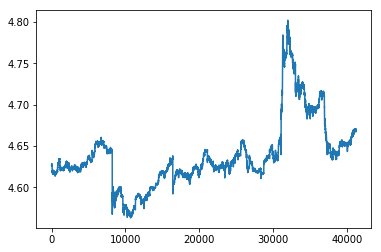

In [40]:
import numpy as np
import matplotlib.pyplot as plt
lnpriceADP=np.log(priceADP)
lnpriceADP
plt.plot(lnpriceADP)
plt.show()

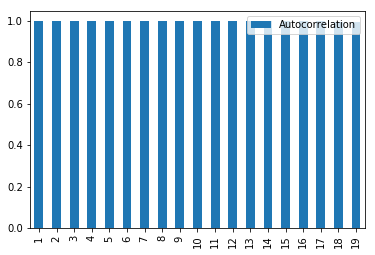

In [44]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
acf_2= acf(lnpriceADP)[1:20]
test_df=pd.DataFrame([acf_2]).T
test_df.columns=['Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

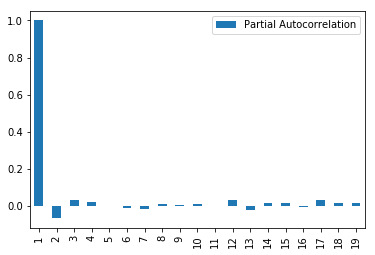

In [48]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
pacf_2= pacf(lnpriceADP)[1:20]
test_df=pd.DataFrame([pacf_2]).T
test_df.columns=['Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

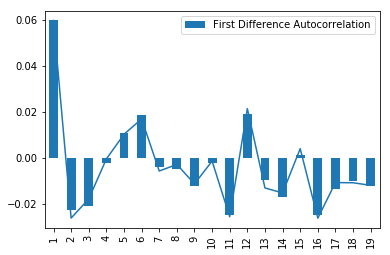

In [53]:
import statsmodels.tsa.stattools as ts
result=ts.adfuller(lnpriceADP,1)
result
lnprice_diff=lnpriceADP-lnpriceADP.shift()
diff=lnprice_diff.dropna()
acf_2_diff=acf(diff)[1:20]
test_df=pd.DataFrame([acf_2_diff]).T
test_df.columns=['First Difference Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
pacf_2_diff=pacf(diff)[1:20]
plt.plot(pacf_2_diff)
plt.show()

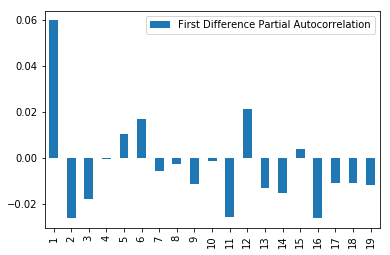

In [57]:
test_df=pd.DataFrame([pacf_2_diff]).T
test_df.columns=['First Difference Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(3, 1, 0)   Log Likelihood              241366.710
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 21 Nov 2018   AIC                        -482723.420
Time:                        18:13:23   BIC                        -482680.281
Sample:                             1   HQIC                       -482709.786
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.826e-07   3.49e-06      0.281      0.779   -5.87e-06    7.83e-06
ar.L1.D.y      0.0608      0.005     12.353      0.000       0.051       0.070
ar.L2.D.y     -0.0252      0.005     -5.116      0.0

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


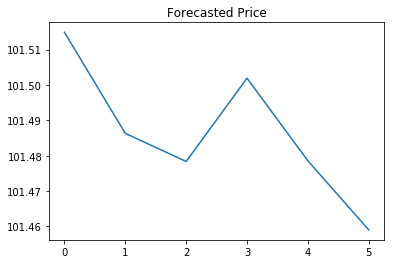

In [62]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
price_matrix=lnpriceADP.as_matrix()
model=ARIMA(price_matrix,order=(3,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(122,127,typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title("Forecasted Price")
plt.show()

# 3.NASDAQ.CBOE

In [37]:
priceCBOE=data['NASDAQ.CBOE']
priceCBOE.head()

0    81.03
1    81.21
2    81.21
3    81.13
4    81.12
Name: NASDAQ.CBOE, dtype: float64

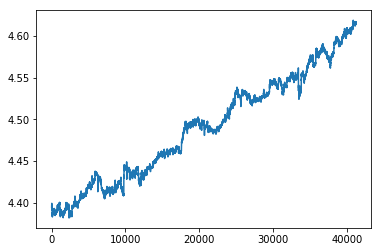

In [41]:
import numpy as np
import matplotlib.pyplot as plt
lnpriceCBOE=np.log(priceCBOE)
lnpriceCBOE
plt.plot(lnpriceCBOE)
plt.show()

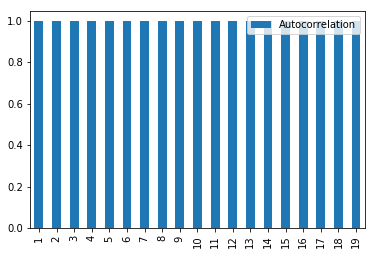

In [45]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
acf_3= acf(lnpriceCBOE)[1:20]
test_df=pd.DataFrame([acf_3]).T
test_df.columns=['Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

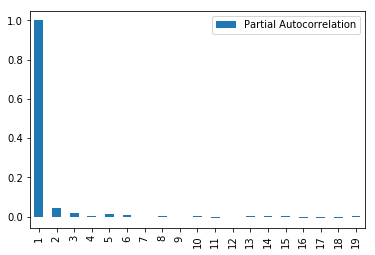

In [49]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
pacf_3= pacf(lnpriceCBOE)[1:20]
test_df=pd.DataFrame([pacf_3]).T
test_df.columns=['Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

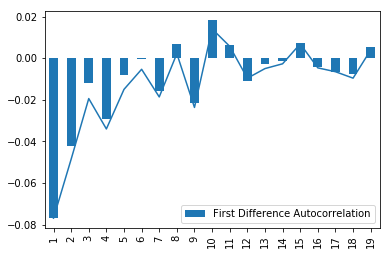

In [54]:
import statsmodels.tsa.stattools as ts
resultCBOE=ts.adfuller(lnpriceCBOE,1)
resultCBOE
lnprice_diff=lnpriceCBOE-lnpriceCBOE.shift()
diff=lnprice_diff.dropna()
acf_3_diff=acf(diff)[1:20]
test_df=pd.DataFrame([acf_3_diff]).T
test_df.columns=['First Difference Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
pacf_3_diff=pacf(diff)[1:20]
plt.plot(pacf_3_diff)
plt.show()

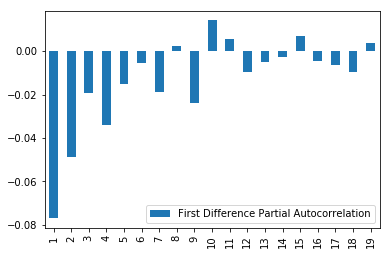

In [60]:
test_df=pd.DataFrame([pacf_3_diff]).T
test_df.columns=['First Difference Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(2, 1, 0)   Log Likelihood              253214.548
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 21 Nov 2018   AIC                        -506421.096
Time:                        18:14:05   BIC                        -506386.585
Sample:                             1   HQIC                       -506410.188
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.302e-06   2.28e-06      2.324      0.020     8.3e-07    9.77e-06
ar.L1.D.y     -0.0806      0.005    -16.397      0.000      -0.090      -0.071
ar.L2.D.y     -0.0485      0.005     -9.871      0.0

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


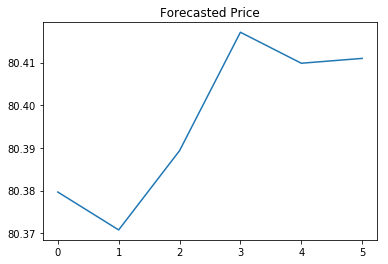

In [63]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
price_matrix=lnpriceCBOE.as_matrix()
model=ARIMA(price_matrix,order=(2,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(122,127,typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title("Forecasted Price")
plt.show()

# 4.NASDAQ.CSCO

In [38]:
priceCSCO=data['NASDAQ.CSCO']
priceCSCO.head()

0    33.7400
1    33.8800
2    33.9000
3    33.8499
4    33.8400
Name: NASDAQ.CSCO, dtype: float64

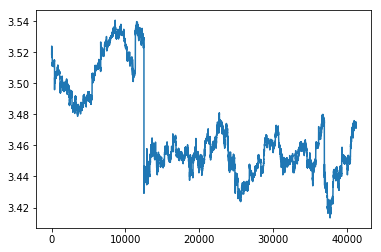

In [42]:
import numpy as np
import matplotlib.pyplot as plt
lnpriceCSCO=np.log(priceCSCO)
lnpriceCSCO
plt.plot(lnpriceCSCO)
plt.show()

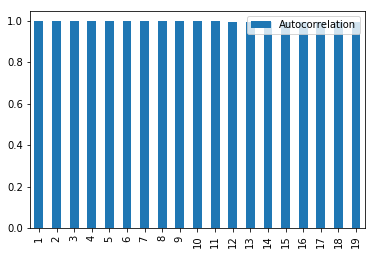

In [46]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
acf_4= acf(lnpriceCSCO)[1:20]
test_df=pd.DataFrame([acf_4]).T
test_df.columns=['Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

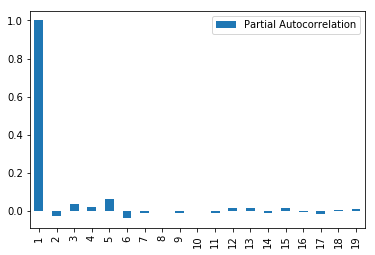

In [50]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
pacf_4= pacf(lnpriceCSCO)[1:20]
test_df=pd.DataFrame([pacf_4]).T
test_df.columns=['Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

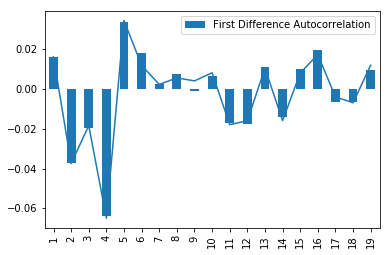

In [55]:
import statsmodels.tsa.stattools as ts
resultCSCO=ts.adfuller(lnpriceCSCO,1)
resultCSCO
lnprice_diff=lnpriceCSCO-lnpriceCSCO.shift()
diff=lnprice_diff.dropna()
acf_4_diff=acf(diff)[1:20]
test_df=pd.DataFrame([acf_4_diff]).T
test_df.columns=['First Difference Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
pacf_4_diff=pacf(diff)[1:20]
plt.plot(pacf_4_diff)
plt.show()

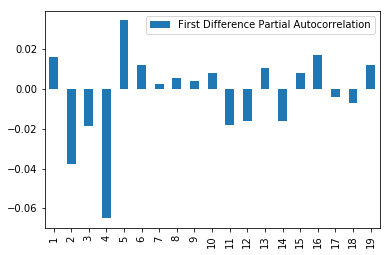

In [59]:
test_df=pd.DataFrame([pacf_4_diff]).T
test_df.columns=['First Difference Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(2, 1, 0)   Log Likelihood              243468.713
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 21 Nov 2018   AIC                        -486929.427
Time:                        18:15:01   BIC                        -486894.916
Sample:                             1   HQIC                       -486918.519
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.119e-06    3.2e-06     -0.350      0.726   -7.38e-06    5.15e-06
ar.L1.D.y      0.0167      0.005      3.397      0.001       0.007       0.026
ar.L2.D.y     -0.0375      0.005     -7.621      0.0

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


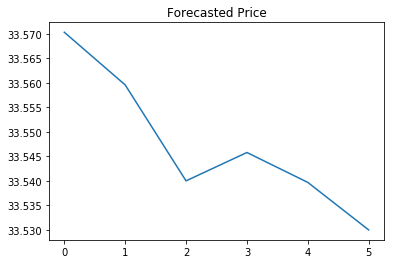

In [64]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
price_matrix=lnpriceCSCO.as_matrix()
model=ARIMA(price_matrix,order=(2,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(122,127,typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title("Forecasted Price")
plt.show()

# 5. NASDAQ.EBAY

In [39]:
priceEBAY=data['NASDAQ.EBAY']
priceEBAY.head()

0    33.3975
1    33.3950
2    33.4100
3    33.3350
4    33.4000
Name: NASDAQ.EBAY, dtype: float64

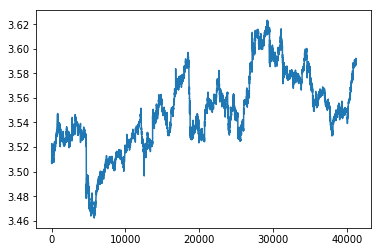

In [43]:
import numpy as np
import matplotlib.pyplot as plt
lnpriceEBAY=np.log(priceEBAY)
lnpriceEBAY
plt.plot(lnpriceEBAY)
plt.show()

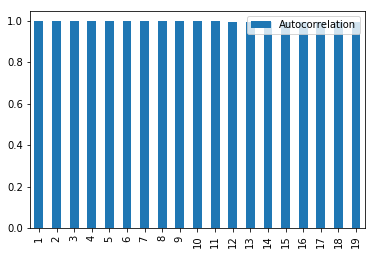

In [47]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
acf_5= acf(lnpriceEBAY)[1:20]
test_df=pd.DataFrame([acf_5]).T
test_df.columns=['Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

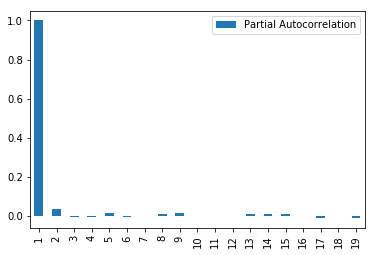

In [51]:
from matplotlib import figure
from statsmodels.tsa.stattools import acf, pacf
pacf_5= pacf(lnpriceEBAY)[1:20]
test_df=pd.DataFrame([pacf_5]).T
test_df.columns=['Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

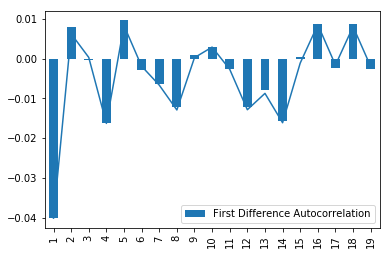

In [56]:
import statsmodels.tsa.stattools as ts
resultEBAY=ts.adfuller(lnpriceEBAY,1)
resultEBAY
lnprice_diff=lnpriceEBAY-lnpriceEBAY.shift()
diff=lnprice_diff.dropna()
acf_5_diff=acf(diff)[1:20]
test_df=pd.DataFrame([acf_5_diff]).T
test_df.columns=['First Difference Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
pacf_5_diff=pacf(diff)[1:20]
plt.plot(pacf_5_diff)
plt.show()

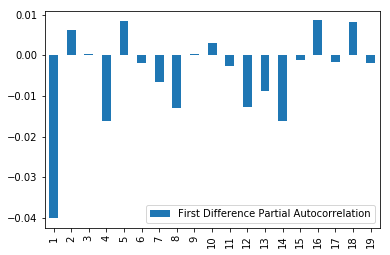

In [58]:
test_df=pd.DataFrame([pacf_5_diff]).T
test_df.columns=['First Difference Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(2, 1, 0)   Log Likelihood              243305.359
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 21 Nov 2018   AIC                        -486602.718
Time:                        18:15:20   BIC                        -486568.207
Sample:                             1   HQIC                       -486591.810
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.901e-06   3.17e-06      0.600      0.549   -4.31e-06    8.11e-06
ar.L1.D.y     -0.0398      0.005     -8.092      0.000      -0.049      -0.030
ar.L2.D.y      0.0063      0.005      1.271      0.2

C:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


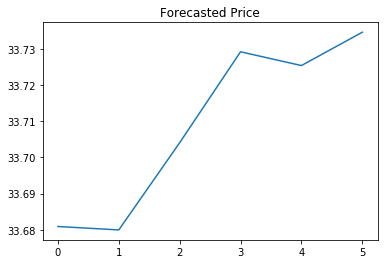

In [65]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
price_matrix=lnpriceEBAY.as_matrix()
model=ARIMA(price_matrix,order=(2,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(122,127,typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title("Forecasted Price")
plt.show()